In [44]:
import cravat
import pandas
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [4]:
out=cravat.run(inputs=['example_input'], annotators=['biogrid', 'clinvar'], reports=['pandas'], genome='hg38', silent=True)

In [10]:
out.head(6)

,base__uid,base__chrom,base__pos,base__ref_base,base__alt_base,base__note,base__coding,base__hugo,base__transcript,base__so,...,base__samples,base__tags,biogrid__biogrid,biogrid__acts,biogrid__id,clinvar__sig,clinvar__disease_refs,clinvar__disease_names,clinvar__rev_stat,clinvar__id
0,1,chr10,121593817,T,A,None,Yes,FGFR2,ENST00000358487.9,start_lost,...,s0,,APP[21832049]|ERRFI1[25640309]|PTPRR[28065597]...,ANOS1;APP;BCL11A;BEX1;BEX2;BRAF;C8orf74;CBL;CC...,108554,None,None,None,None,None
1,2,chr10,2987654,T,A,None,None,None,None,None,...,s1,,None,None,None,None,None,None,None,None
2,3,chr10,43077259,A,T,None,Yes,RET,ENST00000355710.8,start_lost,...,s2,,RET[12787916]|PTPRR[28065597]|ICE2[26496610]|C...,AIP;BAG6;CBL;CBLC;CRK;DOK1;DOK2;DOK4;DOK5;DOK6...,111911,None,None,None,None,None
3,4,chr10,8055656,A,T,None,Yes,GATA3,ENST00000379328.9,start_lost,...,s3,,HDAC4[16922677]|FOXA1[27926873]|HDAC5[17075044...,ACTN2;BMI1;BRCA1;CDK2;FBXW7;FOXA1;FOXP3;HDAC3;...,108895,None,None,None,None,None
4,5,chr10,87864470,A,T,None,Yes,PTEN,ENST00000371953.8,start_lost,...,s4,,RPL31[26561776]|TXNDC11[24104479]|HNRNPU[21532...,AATK;ACACA;ACACB;ADA;ADGRF3;AKAP12;AKT1;AMHR2;...,111700,None,None,None,None,None
5,6,chr10,87864486,A,-,None,Yes,PTEN,ENST00000371953.8,frameshift_truncation,...,s0,,RPL31[26561776]|TXNDC11[24104479]|HNRNPU[21532...,AATK;ACACA;ACACB;ADA;ADGRF3;AKAP12;AKT1;AMHR2;...,111700,None,None,None,None,None


In [20]:
so_count=out.value_counts('base__so'); so_count

base__so
start_lost                144
missense_variant           41
intron_variant             31
frameshift_truncation      23
inframe_insertion          21
frameshift_elongation      21
stop_gained                11
inframe_deletion           11
3_prime_UTR_variant         8
lnc_RNA                     8
splice_site_variant         7
complex_substitution        5
5_prime_UTR_variant         5
synonymous_variant          5
stop_lost                   5
2kb_upstream_variant        4
2kb_downstream_variant      4
misc_RNA                    1
dtype: int64

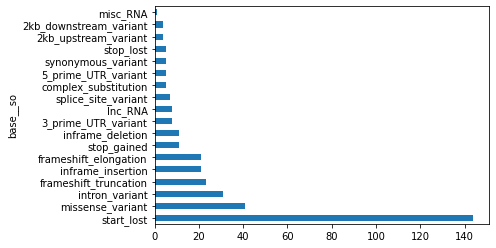

In [71]:
so_count.plot(kind='barh');

In [ ]:
output_paths=cravat.run_reporter(dbpath='example_input.sqlite', reporttypes=['tsv', 'rdata'])

In [75]:
output_paths

{'tsv': ['example_input.variant.tsv'],
 'rdata': ['example_input.variant.RData']}

In [77]:
tsv_data=pandas.read_csv('example_input.variant.tsv', sep='\t', comment='#')

In [79]:
tsv_data.head()

,uid,chrom,pos,ref_base,alt_base,note,coding,hugo,transcript,so,...,samples,tags,biogrid.biogrid,biogrid.acts,biogrid.id,clinvar.sig,clinvar.disease_refs,clinvar.disease_names,clinvar.rev_stat,clinvar.id
0,1,chr10,121593817,T,A,NaN,Yes,FGFR2,ENST00000358487.9,start_lost,...,s0,NaN,APP[21832049]|ERRFI1[25640309]|PTPRR[28065597]...,ANOS1;APP;BCL11A;BEX1;BEX2;BRAF;C8orf74;CBL;CC...,108554.0,NaN,NaN,NaN,NaN,NaN
1,2,chr10,2987654,T,A,NaN,NaN,NaN,NaN,NaN,...,s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,chr10,43077259,A,T,NaN,Yes,RET,ENST00000355710.8,start_lost,...,s2,NaN,RET[12787916]|PTPRR[28065597]|ICE2[26496610]|C...,AIP;BAG6;CBL;CBLC;CRK;DOK1;DOK2;DOK4;DOK5;DOK6...,111911.0,NaN,NaN,NaN,NaN,NaN
3,4,chr10,8055656,A,T,NaN,Yes,GATA3,ENST00000379328.9,start_lost,...,s3,NaN,HDAC4[16922677]|FOXA1[27926873]|HDAC5[17075044...,ACTN2;BMI1;BRCA1;CDK2;FBXW7;FOXA1;FOXP3;HDAC3;...,108895.0,NaN,NaN,NaN,NaN,NaN
4,5,chr10,87864470,A,T,NaN,Yes,PTEN,ENST00000371953.8,start_lost,...,s4,NaN,RPL31[26561776]|TXNDC11[24104479]|HNRNPU[21532...,AATK;ACACA;ACACB;ADA;ADGRF3;AKAP12;AKT1;AMHR2;...,111700.0,NaN,NaN,NaN,NaN,NaN


In [80]:
so_count=out.value_counts('base__so'); so_count

base__so
start_lost                144
missense_variant           41
intron_variant             31
frameshift_truncation      23
inframe_insertion          21
frameshift_elongation      21
stop_gained                11
inframe_deletion           11
3_prime_UTR_variant         8
lnc_RNA                     8
splice_site_variant         7
complex_substitution        5
5_prime_UTR_variant         5
synonymous_variant          5
stop_lost                   5
2kb_upstream_variant        4
2kb_downstream_variant      4
misc_RNA                    1
dtype: int64

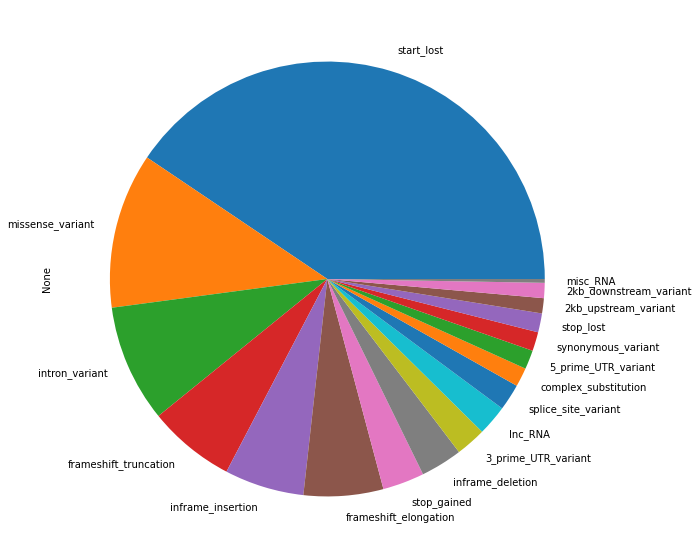

In [85]:
so_count.plot.pie(figsize=(10,10));